# PyTorch Crash Course
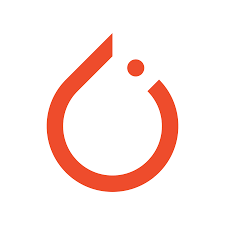

### Imports

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import pandas as pd

## Template Structure
![Template](../imgs/torch_template.png)


### Constants


In [2]:
C = 2  # No. of Classes (Positive / Negative)
D = False # Bi-Directional ?
B = 32 # Batch Size
S = 40 # Sequence Len (Max-Length)
E = 300 # Embedding Dimension
H = 128 # Embedding Dimension
V = 5_00 # Vocab Size
L = 1 # num_layers

## Objective

In [ ]:
class SA(nn.Module):
    def __init__(self) -> None:
        super().__init__()
        self.emb = nn.Embedding(V, E)
        self.gru = nn.GRU(E, H, batch_first=True)
        self.lin = nn.Linear(H, C)

    def forward(self, x):
        # x.shape (B, S)
        x = self.emb(x)
        # x.shape (B, S, E)
        out, h = self.gru(x)
        # out.shape (B, S, H)
        # h.shape (L, B, H)
        pred = self.lin(h.squeeze(0))
        # pred.shape (B, C)
        return pred

### Embedding Layer

![Single](../imgs/Embedding-Layer-Single.png)

![Embedding](../imgs/Embedding-Layer3.png)

### Code

In [4]:
X = torch.randint(low=1, high=V, size=(B, S))
X.shape

torch.Size([32, 40])

In [5]:
emb = nn.Embedding(V, E)

In [6]:
X_emb = emb(X)

In [7]:
X_emb.shape

torch.Size([32, 40, 300])

### GRU Layer

#### GRU Cell

![GRU-internal](../imgs/GRU-internal2.png)

#### Overview

![GRU Layer](../imgs/gru_overview_1_layers_dim.png)


#### Code

In [20]:
model = nn.GRU(E, H, batch_first=True)

In [21]:
out, h = model(X_emb)
out.shape, h.shape

(torch.Size([32, 40, 128]), torch.Size([1, 32, 128]))

#### GRU Details

##### Single Layer No Bi-Directional

![GRU Details Single](../imgs/gru_details_1_layer.png)

##### 2 Layers

![GRU Details Single](../imgs/gru_overview_2_layers.png)

![GRU Details Single](../imgs/gru_details_2_layers.png)

##### Bidirectional

![Bidirectional](../imgs/gru_overview_bidirectional.png)

![Bidirectional](../imgs/gru_details_bidirectional.png)

##### Bidirectional & 2 Layers

![BI-2-Layers](../imgs/gru_overview_bidirectional_2_layers.png)

### Linear Layer

![Linear-Details](../imgs/linear_details.png)

#### Code

In [ ]:
lin = nn.Linear(H, C)

In [ ]:
h.squeeze().shape, out[:, -1, :].shape # B x H

(torch.Size([32, 128]), torch.Size([32, 128]))

In [ ]:
pred = lin(h.squeeze())
pred.shape

torch.Size([32, 2])

#### Start

In [3]:
C = 2  # No. of Classes (Positive / Negative)
D = False # Bi-Directional ?
B = 32 # Batch Size
S = 40 # Sequence Len (Max-Length)
E = 300 # Embedding Dimension
H = 128 # Embedding Dimension
V = 5_00 # Vocab Size
L = 1 # num_layers

In [4]:
emb = nn.Embedding(V, E)

In [5]:
X = torch.randint(low=1, high=V, size=(B, S))
X.shape

torch.Size([32, 40])

In [6]:
X_emb = emb(X)
X_emb.shape

torch.Size([32, 40, 300])

In [9]:
# L = 3
# D = True
gru = nn.GRU(E, H, batch_first=True, num_layers = L, bidirectional = False)

In [10]:
output, h = gru(X_emb)
output.shape, h.shape

(torch.Size([32, 40, 128]), torch.Size([1, 32, 128]))

In [29]:
# Last Output Layer is the Last Hidden Layer
(output[:, -1, :] == h.squeeze(0))*1

tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1]])

In [43]:
h = h.reshape(B, -1)
h.shape

torch.Size([32, 768])

In [44]:
fc = nn.Linear(H * L * 2, C)
pred = fc(h)
pred.shape

torch.Size([32, 2])

In [16]:
h.shape

torch.Size([1, 32, 128])

In [17]:
h.squeeze(0).shape

torch.Size([32, 128])

## Objective

In [29]:
class SA(nn.Module):
    def __init__(self) -> None:
        super().__init__()
        self.emb = nn.Embedding(V, E)
        self.gru = nn.GRU(E, H, batch_first=True)
        self.lin = nn.Linear(H, C)

    def forward(self, x):
        # x.shape (B, S)
        x = self.emb(x)
        # x.shape (B, S, E)
        _, h = self.gru(x)
        # out.shape (B, S, H)
        # h.shape (L, B, H)
        pred = self.lin(h.squeeze(0))
        # pred.shape (B, C)
        return pred

In [30]:
model = SA()

In [31]:
X.shape

torch.Size([32, 40])

In [32]:
y_hat = model(X)
y_hat.shape

torch.Size([32, 2])

In [42]:
F.softmax(y_hat[:10], dim=1)

tensor([[0.3665, 0.6335],
        [0.3403, 0.6597],
        [0.5196, 0.4804],
        [0.4762, 0.5238],
        [0.4106, 0.5893],
        [0.4353, 0.5647],
        [0.7010, 0.2990],
        [0.5450, 0.4550],
        [0.4759, 0.5241],
        [0.3238, 0.6762]], grad_fn=<SoftmaxBackward0>)